In [1]:
import numpy as np
from matplotlib import pyplot as plt
import psi4

In [2]:
mol_str = """
H
H 1 1.0
symmetry c1
"""

options_dict = {
    "basis": "cc-pVTZ",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    'num_roots' : 5
}

mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)
scf_e, wfn = psi4.energy('SCF', return_wfn=True)
fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)



Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYY31VALT
*** at Wed Jan  3 14:39:56 2024

   => Loading Basis Set <=

    Name: CC-PVTZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2 entry H          line    23 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/cc-pvtz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: D_inf_h

    Geometry (in Ang

In [3]:
scf_e, wfn = psi4.energy('SCF', return_wfn=True)
fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYY31VALT
*** at Wed Jan  3 14:40:20 2024

   => Loading Basis Set <=

    Name: CC-PVTZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2 entry H          line    23 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/cc-pvtz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: D_inf_h

    Geometry (in Ang

In [4]:
wfn.variables()

{'CI CORRELATION ENERGY': -0.043696522765990675,
 'CI ROOT 0 CORRELATION ENERGY': -0.043696522765990675,
 'CI ROOT 0 TOTAL ENERGY': -1.1457588464272135,
 'CI ROOT 1 CORRELATION ENERGY': 0.3769577758184338,
 'CI ROOT 1 TOTAL ENERGY': -0.725104547842789,
 'CI ROOT 2 CORRELATION ENERGY': 0.563645319543639,
 'CI ROOT 2 TOTAL ENERGY': -0.5384170041175839,
 'CI ROOT 3 CORRELATION ENERGY': 0.7364285577135588,
 'CI ROOT 3 TOTAL ENERGY': -0.36563376594766406,
 'CI ROOT 4 CORRELATION ENERGY': 0.7417962301773047,
 'CI ROOT 4 TOTAL ENERGY': -0.36026609348391814,
 'CI TOTAL ENERGY': -1.1457588464272135,
 'CURRENT CORRELATION ENERGY': -0.043696522765990675,
 'CURRENT ENERGY': -1.1457588464272135,
 'CURRENT REFERENCE ENERGY': -1.1020623236612228,
 'DD SOLVATION ENERGY': 0.0,
 'DETCI AVG DVEC NORM': 2.2869302054536223e-07,
 'FCI CORRELATION ENERGY': -0.043696522765990675,
 'FCI TOTAL ENERGY': -1.1457588464272135,
 'HF KINETIC ENERGY': 0.918278397912208,
 'HF POTENTIAL ENERGY': -2.020340721573431,
 'HF

In [2]:
mol_tmpl = """
H
H 1 **R**
symmetry c1
"""

options_dict = {
    "basis": "cc-pVQZ",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    'num_roots' : 2
}

r_data = np.linspace(0.6, 1.85, 50)
psi4.set_options(options_dict)

fci_S0 = []
fci_S1 = []
for r in r_data:
    mol_str = mol_tmpl.replace("**R**", str(r))
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    fci_S0.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    fci_S1.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))
    
    


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYY31VALT
*** at Mon Nov 27 13:53:46 2023

   => Loading Basis Set <=

    Name: CC-PVQZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2 entry H          line    22 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/cc-pvqz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: D_inf_h

    Geometry (in Ang

(-0.75, -0.65)

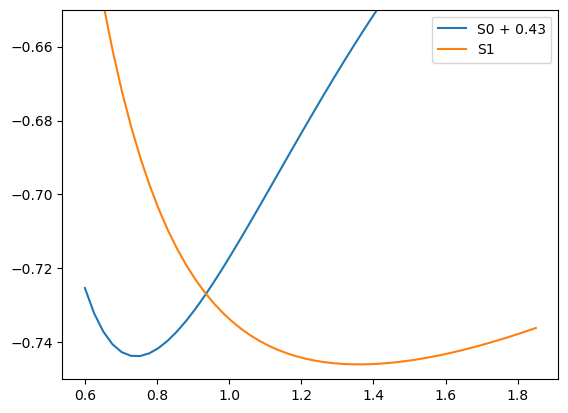

In [7]:
plt.plot(r_data, np.array(fci_S0)+0.43, label="S0 + 0.43")
plt.plot(r_data, fci_S1, label="S1")
plt.legend()
plt.ylim(-0.75, -0.65)